In [ ]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=ccc7e493328684bf66870935a0561930fb26659b3d2ed91d4dc626853e370a3c
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
files.upload()

Saving 4-wheeler-EV-cardekho.csv to 4-wheeler-EV-cardekho.csv
Saving 4-wheeler-EV-carwale.csv to 4-wheeler-EV-carwale.csv


{'4-wheeler-EV-cardekho.csv': b'Review,Rating,Attributes Mentioned,Model\n"Using it for the last 1 month. It\'s a gentle-looking beast. The pickup power is amazing. I tried 2 competitions cars in this segment. This is the best. Refined and well built, and superior performance. The Audio system is better than a premium car segment. The Bluetooth connectivity to stream all music from a phone, music a...",5.0,"[\'mileage\' \'performance\' \'power\' \'price\' \'seat\' \'driver\' \'audio\'\n \'bluetooth\' \'music\' \'pickup\' \'speed\']",hyundai kona\n"In the beginning, the car performed excellently well, but after 4 months the mileage on a full charge steadily reduced, and finally, it would not start at all. After paying a hefty amount for this car l am left without a vehicle and the Hyundai service people assured me that would send a replacement vehicle which they kept postponing with lame excu...",1.0,[\'mileage\' \'performance\' \'service\' \'parts\'],hyundai kona\nHyundai is the best p

In [ ]:
four= pd.read_csv('4-wheeler-EV-carwale.csv')

In [ ]:
four.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [ ]:
four.drop(['review'], axis=1, inplace = True)

In [ ]:
four.isnull().sum()

Exterior           0
Comfort            0
Performance        0
Fuel Economy       0
Value for Money    0
Condition          0
driven             0
rating             0
model_name         0
dtype: int64

In [ ]:
four.drop(['model_name'], axis=1, inplace = True)

In [ ]:
four.shape

(129, 8)

In [ ]:
four.describe()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,4.472868,4.418605,4.418605,4.418605,4.162791,4.341085
std,0.968871,1.036051,1.150392,1.122899,1.345076,1.389110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
four.columns

Index(['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money',
       'Condition', 'driven', 'rating'],
      dtype='object')

In [ ]:
from sklearn import preprocessing


le= preprocessing.LabelEncoder()
four['Condition']= le.fit_transform(four['Condition'])

four['Condition'].unique()

array([0, 1, 2])

In [ ]:
four['driven']= le.fit_transform(four['driven'])

four['driven'].unique()

array([1, 3, 2, 0, 4])

In [ ]:
four.head()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating
0,5.0,4.0,5.0,5.0,5.0,0,1,5.0
1,1.0,1.0,1.0,1.0,1.0,0,3,0.0
2,4.0,5.0,5.0,5.0,4.0,0,2,5.0
3,5.0,5.0,5.0,5.0,5.0,0,2,5.0
4,4.0,4.0,5.0,3.0,2.0,1,3,3.0


array([[<Axes: title={'center': 'Exterior'}>,
        <Axes: title={'center': 'Comfort'}>,
        <Axes: title={'center': 'Performance'}>],
       [<Axes: title={'center': 'Fuel Economy'}>,
        <Axes: title={'center': 'Value for Money'}>,
        <Axes: title={'center': 'Condition'}>],
       [<Axes: title={'center': 'driven'}>,
        <Axes: title={'center': 'rating'}>, <Axes: >]], dtype=object)

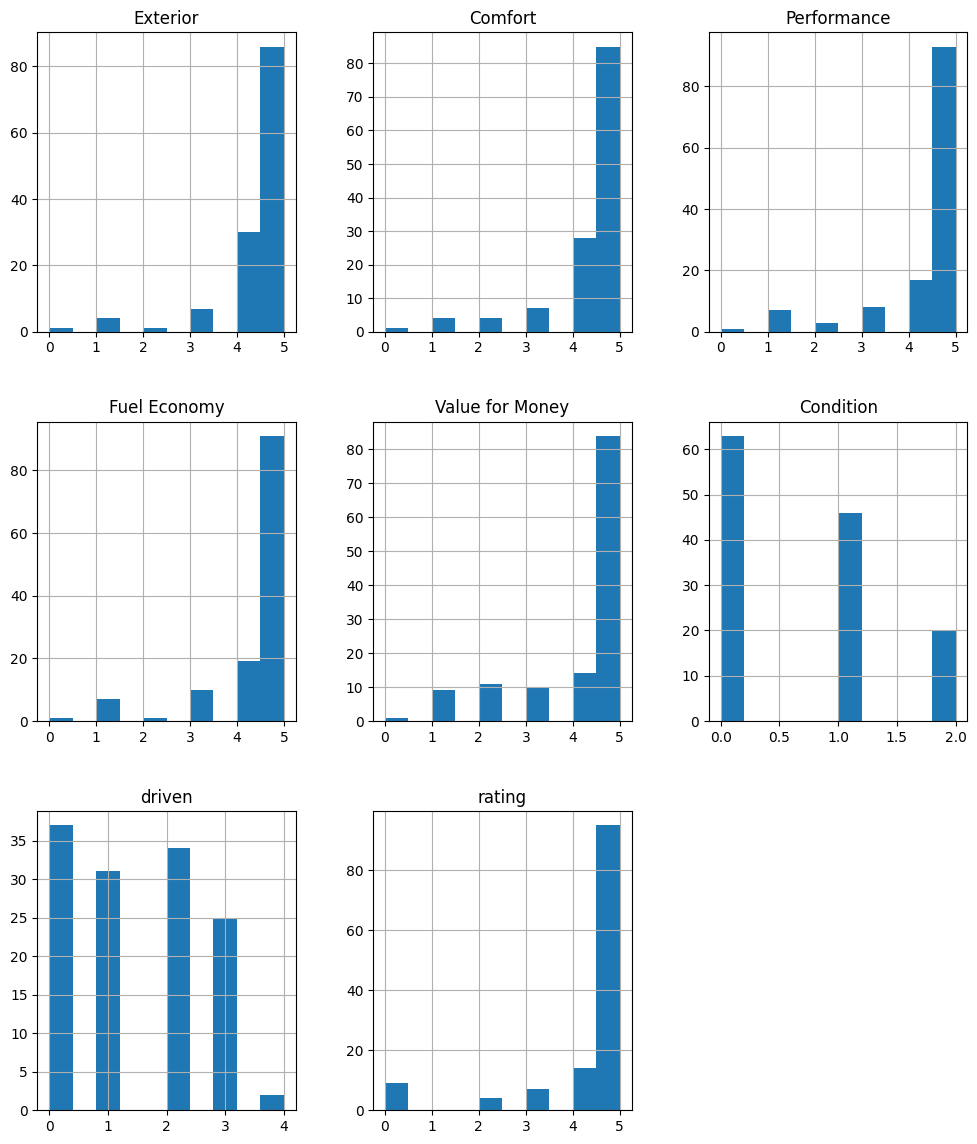

In [ ]:
plt.rcParams['figure.figsize'] = (12,14)
four.hist()

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(four)

pca = PCA(n_components=8)
pc = pca.fit_transform(four)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-1.208361,-0.304724,0.309917,-0.834151,-0.085165,0.125032,0.134075,0.701255
1,8.678659,1.170277,-0.169695,-1.066553,-0.868793,-0.325554,-0.466219,-0.079578
2,-0.709174,0.679112,0.220852,-0.483245,0.312397,0.796009,-0.153589,-0.699028
3,-1.523190,0.721443,-0.028150,-0.568322,0.100733,-0.044930,0.192378,-0.070798
4,2.339475,1.549935,-0.482388,0.667783,1.236664,0.304712,-1.287881,0.164532
...,...,...,...,...,...,...,...,...
124,0.963189,-1.328042,0.024247,-0.335689,1.191417,0.020568,0.560455,0.410145
125,-1.620402,-1.357605,0.007627,0.192696,-0.034635,-0.140811,-0.037977,0.013473
126,-1.620402,-1.357605,0.007627,0.192696,-0.034635,-0.140811,-0.037977,0.013473
127,-0.366558,1.477167,0.529178,0.102541,-1.378602,0.308768,0.283524,0.021779


In [ ]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = four.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
variable,,,,,,,,
Exterior,-0.328093,0.046717,-0.231188,0.196683,0.429183,-0.326879,0.423845,0.572144
Comfort,-0.363515,0.037113,-0.297672,0.196746,0.291877,-0.211186,0.053684,-0.778773
Performance,-0.416174,0.048560,-0.113874,-0.096029,0.304970,0.212161,-0.785175,0.218483
Fuel Economy,-0.382755,-0.055823,-0.365507,-0.044724,-0.292204,0.714286,0.344352,0.024935
Value for Money,-0.485923,-0.004387,-0.017815,-0.281760,-0.640847,-0.514060,-0.077878,0.056086
Condition,0.000162,-0.100939,-0.045011,0.899182,-0.347326,-0.013432,-0.221118,0.097710
driven,0.048687,0.989054,-0.040395,0.069082,-0.105979,0.041225,0.004619,0.006720
rating,-0.449464,0.050299,0.841074,0.136729,0.098327,0.164913,0.165581,-0.071200


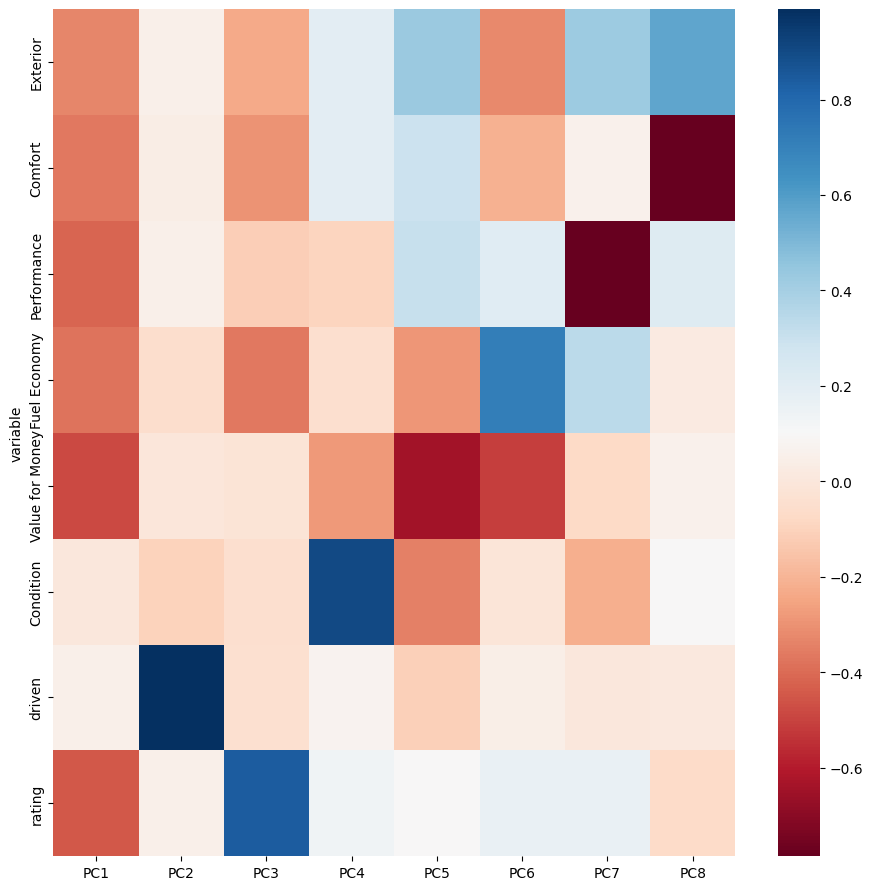

In [ ]:
plt.rcParams['figure.figsize'] = (11,11)
ax = sns.heatmap(loadings_df, annot=False, cmap='RdBu')

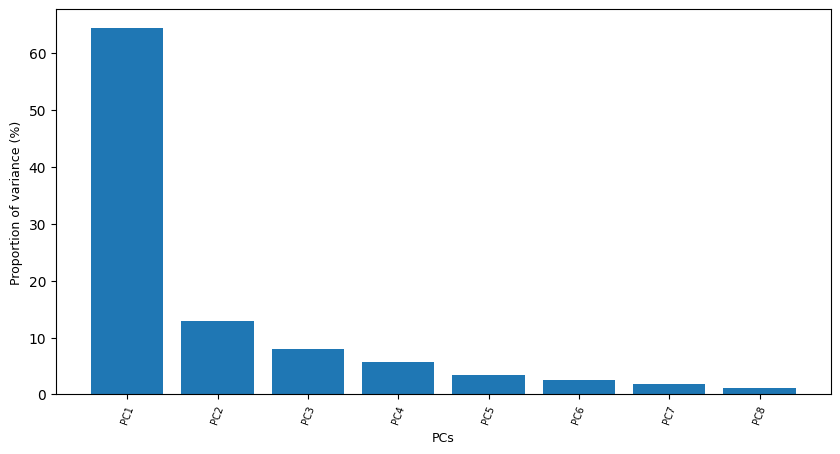

In [ ]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

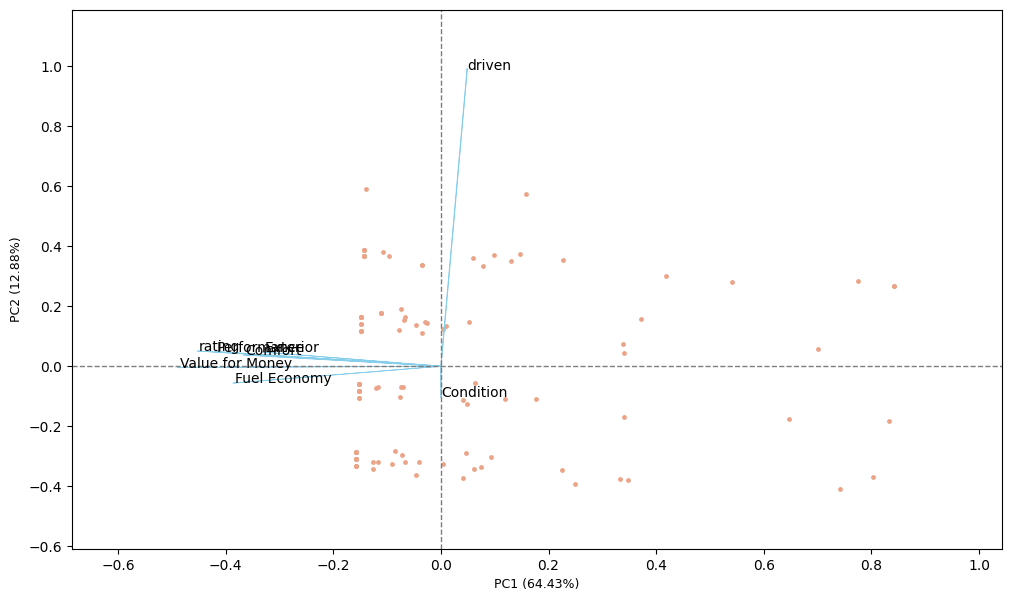

In [ ]:
pca_scores = PCA().fit_transform(four)

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=four.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(12,7))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

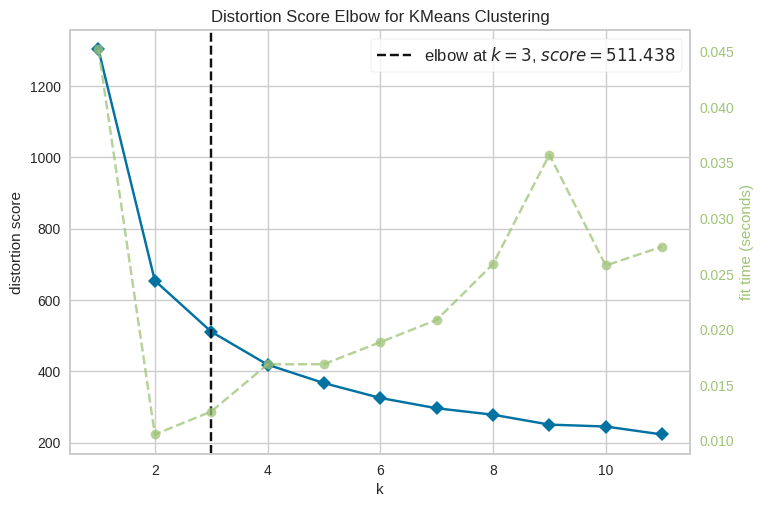

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(four)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=43).fit(four)
four['cluster_number'] = kmeans.labels_
print (kmeans.labels_)
print (kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 2 1 2 0 0 0 0 0
 0 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0
 0 1 2 1 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 2 0 2 0 0 0 2]
511.4377777777778
9
[[4.78       4.77       4.86       4.84       4.79       0.64
  1.34       4.91      ]
 [1.66666667 1.33333333 1.         1.22222222 0.88888889 0.44444444
  1.77777778 1.22222222]
 [4.2        4.05       3.75       3.75       2.5        0.9
  1.6        2.9       ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 100, 1: 9, 2: 20})

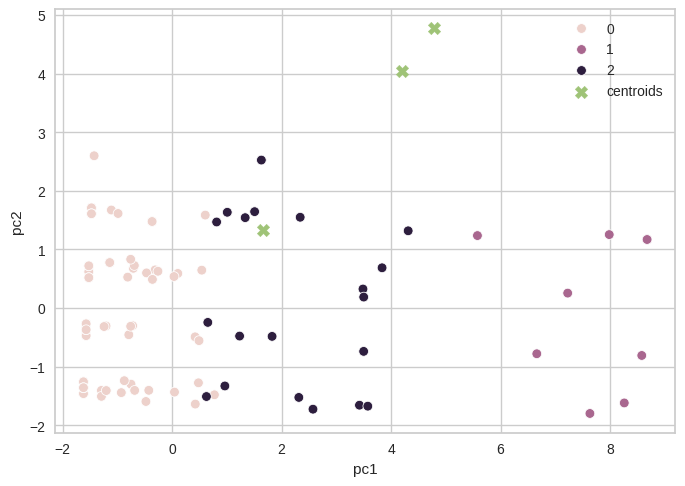

In [ ]:
#Visualising clusters
sns.scatterplot(data= pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="g", s=80, label="centroids")
plt.legend()
plt.show()

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [15.0, 15.0, 33.75, 33.75],
  [5.0, 5.0, 24.375, 24.375],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [14.6875, 14.6875, 72.5, 72.5]],
 'dcoord': [[0.0, 5.744562646538029, 5.744562646538029, 0.0],
  [0.0, 7.504160872529624, 7.504160872529624, 5.744562646538029],
  [0.0, 8.21943343883072, 8.21943343883072, 7.504160872529624],
  [0.0, 9.971707065041048, 9.971707065041048, 8.21943343883072],
  [0.0, 12.242246345990662, 12.242246345990662, 9.971707065041048],
  [0.0, 11.61895003862225, 11.61895003862225, 0.0],
  [0.0, 18.449532252165383, 18.449532252165383, 11.61895003862225],
  [12.242246345990662,
   44.328618555356684,
   44.328618555356684,
   18.449532252165383]],
 'ivl': ['7', '4', '3', '2', '0', '1', '6', '5', '8'],
 'leaves': [7, 4, 3, 2, 0, 1, 6, 5, 8],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C1', 'C1', 'C1

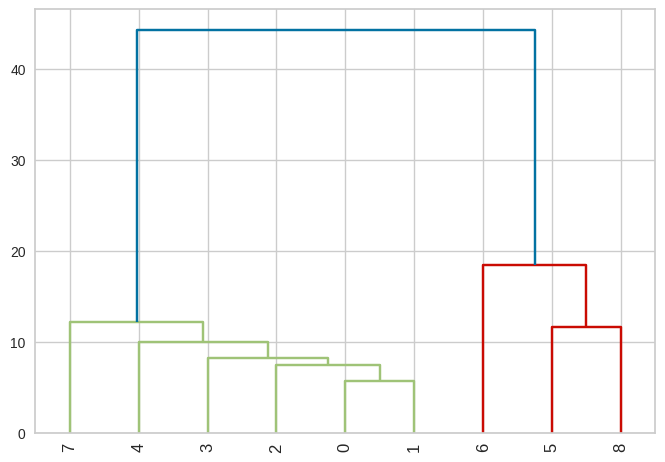

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
D = np.transpose(four)
D = linkage(D, method = "average")


dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

In [ ]:
four['driven'].unique()

array([1, 3, 2, 0, 4])

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(four['cluster_number'],four['driven'])

crosstab = crosstab[[4, 3, 2, 1, 0]]
crosstab

driven,4,3,2,1,0
cluster_number,,,,,
0,1,15,30,25,29
1,0,4,1,2,2
2,1,6,3,4,6


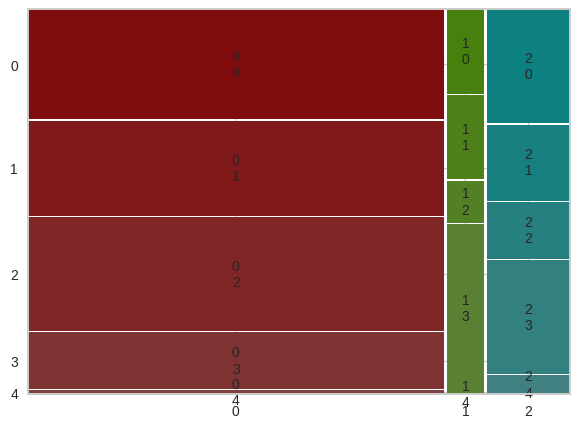

In [ ]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

<Axes: xlabel='cluster_number', ylabel='Value for Money'>

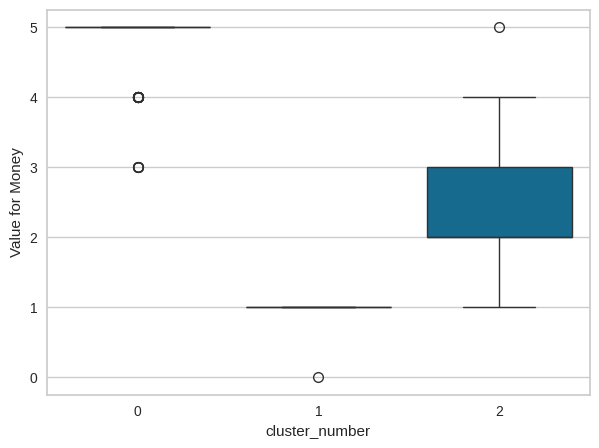

In [ ]:
sns.boxplot(x="cluster_number", y="Value for Money", data=four)

<Axes: xlabel='cluster_number', ylabel='Condition'>

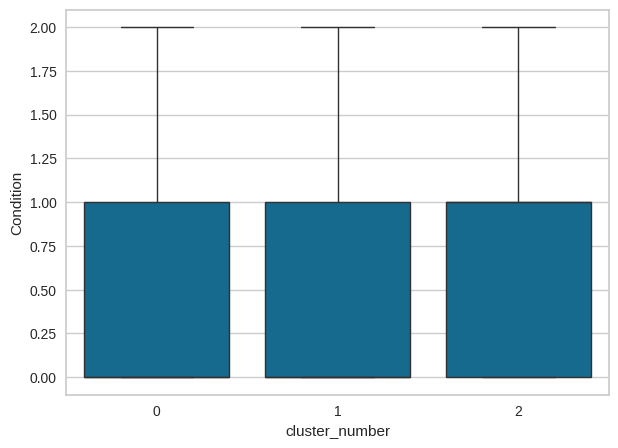

In [ ]:
sns.boxplot(x="cluster_number", y="Condition", data=four)

<Axes: xlabel='cluster_number', ylabel='Comfort'>

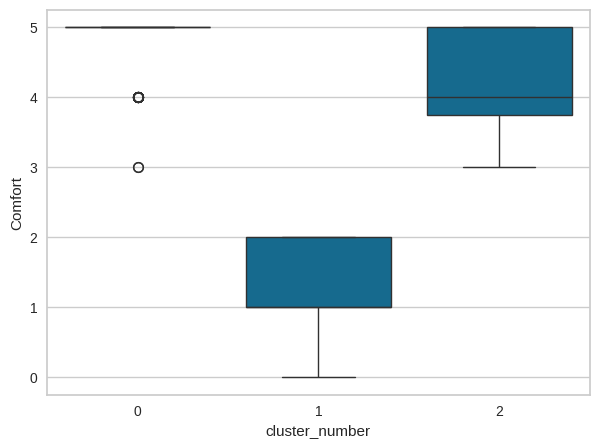

In [ ]:
sns.boxplot(x="cluster_number", y="Comfort", data=four)

<Axes: xlabel='cluster_number', ylabel='Performance'>

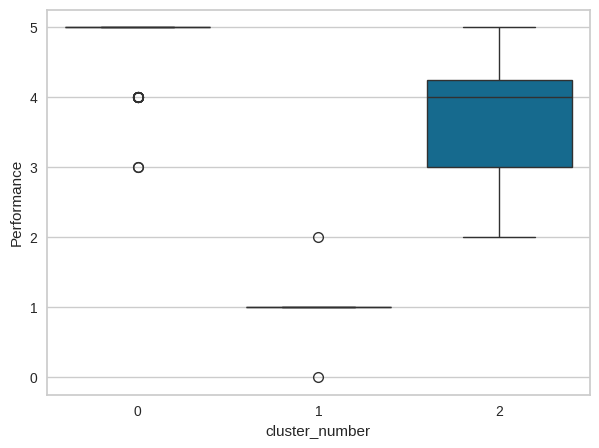

In [ ]:
sns.boxplot(x="cluster_number", y="Performance", data=four)

<Axes: xlabel='cluster_number', ylabel='Fuel Economy'>

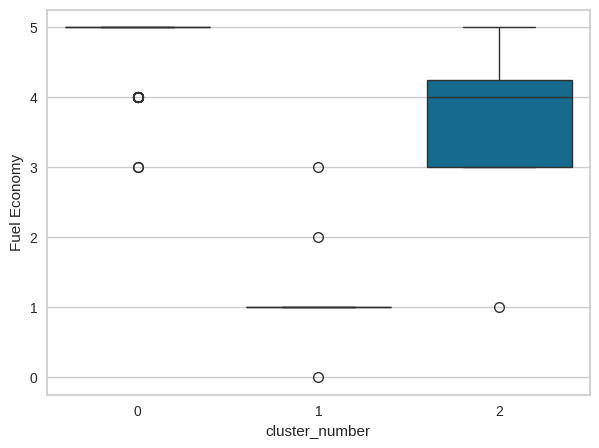

In [ ]:
sns.boxplot(x="cluster_number", y="Fuel Economy", data=four)

<Axes: xlabel='cluster_number', ylabel='Exterior'>

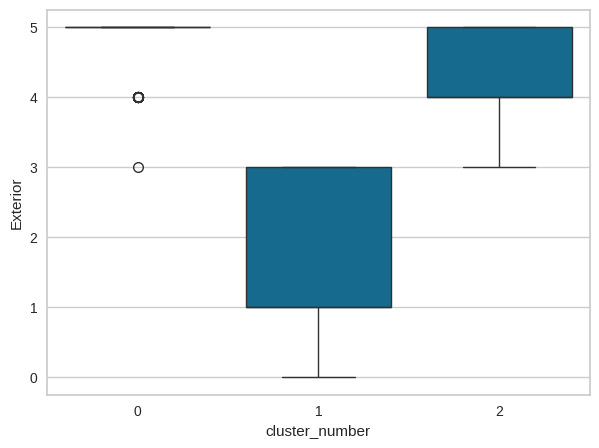

In [ ]:
sns.boxplot(x="cluster_number", y="Exterior", data=four)

In [ ]:
con = four.groupby('cluster_number')['Condition'].mean()
con = con.to_frame().reset_index()
con

,cluster_number,Condition
0,0,0.640000
1,1,0.444444
2,2,0.900000


In [ ]:
val = four.groupby('cluster_number')['Value for Money'].mean()
val = val.to_frame().reset_index()
val

,cluster_number,Value for Money
0,0,4.790000
1,1,0.888889
2,2,2.500000


In [ ]:
eco = four.groupby('cluster_number')['Fuel Economy'].mean()
eco = eco.to_frame().reset_index()
eco

,cluster_number,Fuel Economy
0,0,4.840000
1,1,1.222222
2,2,3.750000


In [ ]:
segment = val.merge(eco, on='cluster_number', how='left').merge(con, on='cluster_number', how='left')
segment

,cluster_number,Value for Money,Fuel Economy,Condition
0,0,4.790000,4.840000,0.640000
1,1,0.888889,1.222222,0.444444
2,2,2.500000,3.750000,0.900000


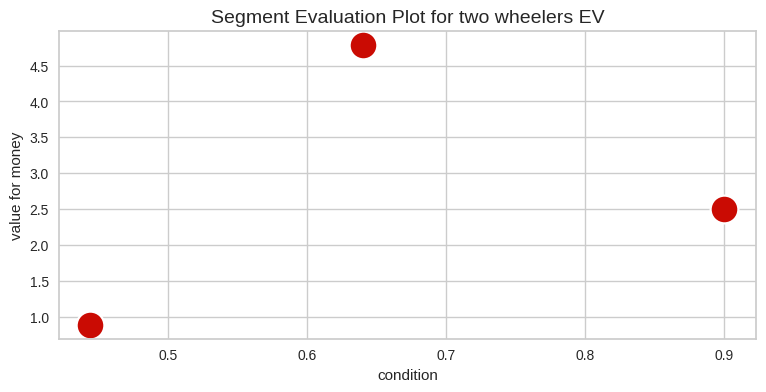

In [ ]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "Condition", y = "Value for Money",data=segment,s=400, color="r")
plt.title("Segment Evaluation Plot for two wheelers EV",
          fontsize = 14)
plt.xlabel("condition", fontsize = 11)
plt.ylabel("value for money", fontsize = 11)
plt.show()